**Put any package imports you need in the below space**

In [162]:
%reset
# you will want this if plotting with pyplot
%matplotlib inline 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx.linalg.spectrum as spectrum



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Exercise 1**: Generating the adjacency matrix A for graphs of particular type. Write a script that generates the adjacency matrix A for each of the following graphs and prints this matrix onto the screen:
1. K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes
2. K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3
3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components
4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part
5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)
6. P5: A simple path of 5 vertices


In [163]:
graphs = {}
adjmats = {}
#1. K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes
graphs['k5'] = nx.complete_graph(5)
adjmats['k5'] = nx.adjacency_matrix(graphs['k5'])
print('Adjacency matrix of k5')
print(adjmats['k5'].todense())

#2. K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3
k3 = nx.complete_graph(3)
graphs['k5.3']= nx.disjoint_union(graphs['k5'],k3)
adjmats['k5.3'] = nx.adjacency_matrix(graphs['k5.3'])
print('Adjacency matrix of k5.3')
print(adjmats['k5.3'].todense())

#3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components
graphs['k5.3e'] = nx.disjoint_union(nx.complete_graph(5),nx.complete_graph(3)) #temporary initialization
graphs['k5.3e'].add_edge(4,5)
adjmats['k5.3e'] = nx.adjacency_matrix(graphs['k5.3e'])
print('Adjacency matrix of k5.3e')
print(adjmats['k5.3e'].todense())

#4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part
graphs['b2.3'] = nx.complete_bipartite_graph(2,3)
adjmats['b2.3'] = nx.adjacency_matrix(graphs['b2.3'])
print('Adjacency matrix of b2.3')
print(adjmats['b2.3'].todense())

#5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)
graphs['s5'] = nx.complete_bipartite_graph(1,4)
adjmats['s5'] = nx.adjacency_matrix(graphs['s5'])
print('Adjacency matrix of s5')
print(adjmats['s5'].todense())

#6. P5: A simple path of 5 vertices
graphs['p5'] = nx.path_graph(5)
adjmats['p5'] = nx.adjacency_matrix(graphs['p5'])
print('Adjacency matrix of p5')
print(adjmats['p5'].todense())



Adjacency matrix of k5
[[0 1 1 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]
Adjacency matrix of k5.3
[[0 1 1 1 1 0 0 0]
 [1 0 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]
Adjacency matrix of k5.3e
[[0 1 1 1 1 0 0 0]
 [1 0 1 1 1 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0 0]
 [1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]]
Adjacency matrix of b2.3
[[0 0 1 1 1]
 [0 0 1 1 1]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
Adjacency matrix of s5
[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
Adjacency matrix of p5
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


**Exercise 2**: Generating the degree matrix D for a given adjacency matrix A. Write a script that generates a degree matrix for each of the adjacency matrices in Exercise 1. Note that the degree matrix is a diagonal matrix where all the positions except for the diagonal are zero's. The diagonal elements correspond to the degrees of the corresponding nodes, namely Dii = degree(v_i).

In [164]:
degmats={}
#function for generating degree matrix
def generate_degmat(adjmat):
    g=nx.to_networkx_graph(adjmat)
    n=len(g.nodes())
    degmat=np.zeros((n,n),dtype=int)
    for i in range(n):
        degmat[i,i]=g.degree(i)
    print degmat
    return degmat
#generating degree matrix for every graph created in exercise 1
for key in graphs:
    print ("Degree matrix for "+key+" graph")
    degmats[key]=generate_degmat(adjmats[key])
    print('\n')


Degree matrix for k5.3 graph
[[4 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 2]]


Degree matrix for p5 graph
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


Degree matrix for s5 graph
[[4 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Degree matrix for k5.3e graph
[[4 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 2]]


Degree matrix for b2.3 graph
[[3 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


Degree matrix for k5 graph
[[4 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]




**Exercise 3**: Generating the graph Laplacian matrix L for a given adjacency matrix A and its degree matrix D. Write a script that generates the graph Laplacian matrix L = D - A for each of the adjacency matrices in Exercise 1.

In [165]:
lapmats={}
#function to generate laplacian matrix from adjacency matrix(a) and degree matrix(d)
def generate_lapmat(a,d):
    l = d - a
    print l
    return l
for key in graphs:
    print ("Laplacian matrix for "+key+" graph")
    lapmats[key]=generate_lapmat(adjmats[key],degmats[key])
    print('\n')

Laplacian matrix for k5.3 graph
[[ 4 -1 -1 -1 -1  0  0  0]
 [-1  4 -1 -1 -1  0  0  0]
 [-1 -1  4 -1 -1  0  0  0]
 [-1 -1 -1  4 -1  0  0  0]
 [-1 -1 -1 -1  4  0  0  0]
 [ 0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]


Laplacian matrix for p5 graph
[[ 1 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  1]]


Laplacian matrix for s5 graph
[[ 4 -1 -1 -1 -1]
 [-1  1  0  0  0]
 [-1  0  1  0  0]
 [-1  0  0  1  0]
 [-1  0  0  0  1]]


Laplacian matrix for k5.3e graph
[[ 4 -1 -1 -1 -1  0  0  0]
 [-1  4 -1 -1 -1  0  0  0]
 [-1 -1  4 -1 -1  0  0  0]
 [-1 -1 -1  4 -1  0  0  0]
 [-1 -1 -1 -1  5 -1  0  0]
 [ 0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1 -1  2]]


Laplacian matrix for b2.3 graph
[[ 3  0 -1 -1 -1]
 [ 0  3 -1 -1 -1]
 [-1 -1  2  0  0]
 [-1 -1  0  2  0]
 [-1 -1  0  0  2]]


Laplacian matrix for k5 graph
[[ 4 -1 -1 -1 -1]
 [-1  4 -1 -1 -1]
 [-1 -1  4 -1 -1]
 [-1 -1 -1  4 -1]
 [-1 -1 -1 -1  4]]




Answer the following questions:
1. Is L a sparse matrix?
2. In what positions does L have non-zero elements?
3. What are the values of the non-diagonal and non-zero elements?
4. What does L contain along its diagonal?



Exercise 3 solutions:
1. For all the graphs the number of non zero elements is greater than the number of zero elements. Hence L isn't a sparse matrix

2. L for every graph g has non-zero elements in:
    a. Diagonal positions
    b. Positions of non-zero elements in adjacency matrix of the respective graph g.

3. The values of non-diagonal and non-zero elements are -1.

4. Diagonal elements are elements in positions (i,i) where i is in [0,number of nodes-1]. Each element in position (i,i) contains the degree of the ith node. 

**Exercise 4**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph adjacency matrix A. Write a script that calculates the eigenvalues of the graph adjacency matrix for each of the matrices in Exercise 1. Plot the eigenvalues in the increasing order of their values

Eigen values of adjacency matrix for k5.3 graph
[-1.+0.j  4.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  2.+0.j -1.+0.j]


Eigen values of adjacency matrix for p5 graph
[  1.73205081e+00+0.j  -1.73205081e+00+0.j  -1.00000000e+00+0.j
  -3.29824209e-17+0.j   1.00000000e+00+0.j]


Eigen values of adjacency matrix for s5 graph
[ 2.+0.j -2.+0.j  0.+0.j  0.+0.j  0.+0.j]


Eigen values of adjacency matrix for k5.3e graph
[ 4.06153444+0.j  2.05492255+0.j -1.77987114+0.j -0.33658584+0.j
 -1.00000000+0.j -1.00000000+0.j -1.00000000+0.j -1.00000000+0.j]


Eigen values of adjacency matrix for b2.3 graph
[  2.44948974e+00+0.j  -2.44948974e+00+0.j   2.88661590e-16+0.j
   9.66600675e-48+0.j   1.21543267e-63+0.j]


Eigen values of adjacency matrix for k5 graph
[-1.+0.j  4.+0.j -1.+0.j -1.+0.j -1.+0.j]




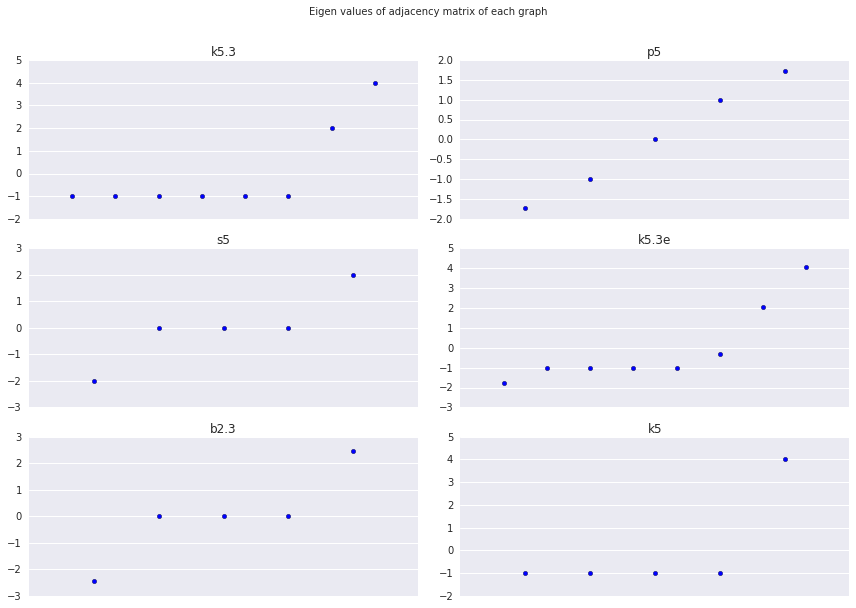

In [166]:
eigen_adjmats={}
ax_eigen_adjmat = {}
#function to generate eigen values from adjacency matrix(a) and degree matrix(d)
def generate_eigen_adjmat(g):
    eigenvalues = spectrum.adjacency_spectrum(g)
    print eigenvalues
    return eigenvalues
fig1=plt.figure()
fig1.set_size_inches(12,8)
fig1.suptitle("Eigen values of adjacency matrix of each graph",y=1.05)
for i,key in enumerate(graphs):
    print ("Eigen values of adjacency matrix for "+key+" graph")
    eigen_adjmats[key]=generate_eigen_adjmat(graphs[key])
    ax_eigen_adjmat[i+1] = fig1.add_subplot(3,2,i+1)
    ax_eigen_adjmat[i+1].set_title(key)
    ax_eigen_adjmat[i+1].scatter(range(len(eigen_adjmats[key])),np.sort(eigen_adjmats[key]))
    ax_eigen_adjmat[i+1].set_xticks([])
    print('\n')
plt.tight_layout()

Answer the following questions:
1. What can you say about the eigenvalues of the complete graph (K5): the number of unique eigenvalues, the largest and the smallest eigenvalues, the multiplicity (how many times the same eigenvalue appears) of each eigenvalue?
2. What is the graph spectrum of the bi-partite graph, B2.3? If n1 = n and n2 = m (a general complete bi-partite graph), then what can you say about its graph spectrum? [Hint: check sqrt(n * m)] If \lambda is the eigenvalue of the bi-partite graph, will minus \lambda be also the eigenvalue?
3. What is the largest eigenvalue of the star graph S5? If S5 were generalized to an N-vertex star, what could you say about the value of its largest eigenvalue?
4. What is the largest eigenvalue of the path graph P5? As the length of the path increases, what can you say about the changes in the largest eigenvalue?
5. How does the largest eigenvalue of the path P5 (or its more generalization to an arbitrary length) compare with the largest eigenvalues of the star graph or the complete graph? If you are asked to sort the largest eigenvalue of the path, the star, and the clique) in the increasing order, what kind of relationship would you assign (E.g., \lambda{path} > or < than \lambda{star})?


Exercise 4 solutions:
1. In k5 graph (Point to note - sum of eigenvalues in complete graph is 0):<br>
    a. Number of unique eigenvalues : 2<br>
    b. Largest eigenvalue : 4+ 0j<br>
    c. Smallest eigenvalue : -1 +0j<br>
    d. Multiplicity: (-1+ 0j) occurs 4 times.(4+ 0j) occurs once.<br>
<br>

2. [  2.44948974e+00+0.j  -2.44948974e+00+0.j   2.88661590e-16+0.j 9.66600675e-48+0.j   1.21543267e-63+0.j] is the spectrum of bipartite. This can be approximated to [  2.44948974e+00+0.j  -2.44948974e+00+0.j   0     0      0       0]. The graph spectrum of the bi partite graph consists of sqrt(nm) and -sqrt(nm) and the remaining values are zero. <br>
<br>
3. Largest eigenvalue of S5: 2 + 0j. The largest eigenvalue of a N-vertex star will be $(N-1)^{1/2}$.<br>
<br>
4. Largest eigenvalue of P5 graph is 1.73205081. As the length of the path increases, the highest eigenvalue tends towards 2 (which is the max degree and is the upper bound of the highest eigenvalue).<br>
<br>
5. Lambda(P5) < Lambda(S5) < Lambda(K5)<br>
   Lambda(path) <= Lambda(star) <= Lambda(clique)<br> 
   
   


**Exercise 5**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph Laplacian. Write a script that calculates the eigenvalues of the graph Laplacian for each of the graphs in Exercise 1. Plot the eigenvalues in the increasing order of their values. 

Eigen values of the Laplacian of k5.3 graph
[ -7.77156117e-16  -1.11022302e-16   3.00000000e+00   3.00000000e+00
   5.00000000e+00   5.00000000e+00   5.00000000e+00   5.00000000e+00]


Eigen values of the Laplacian of p5 graph
[  4.99692479e-17   3.81966011e-01   1.38196601e+00   2.61803399e+00
   3.61803399e+00]


Eigen values of the Laplacian of s5 graph
[ 0.  1.  1.  1.  5.]


Eigen values of the Laplacian of k5.3e graph
[ -1.44328993e-15   3.73801931e-01   3.00000000e+00   3.48486195e+00
   5.00000000e+00   5.00000000e+00   5.00000000e+00   6.14133612e+00]


Eigen values of the Laplacian of b2.3 graph
[ -8.32667268e-16   2.00000000e+00   2.00000000e+00   3.00000000e+00
   5.00000000e+00]


Eigen values of the Laplacian of k5 graph
[ -8.88178420e-16   5.00000000e+00   5.00000000e+00   5.00000000e+00
   5.00000000e+00]




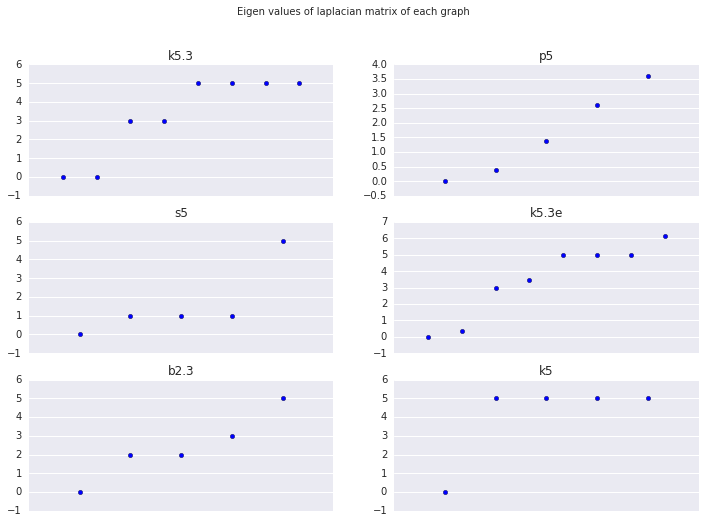

In [159]:
eigen_lap={}
ax = {}
#function to generate laplacian matrix from adjacency matrix(a) and degree matrix(d)
def generate_eigen_adjmat(g):
    eigenvalues = spectrum.laplacian_spectrum(g)
    print eigenvalues
    return eigenvalues
fig = plt.figure()
fig.set_size_inches(12,8)
fig.suptitle("Eigen values of laplacian matrix of each graph",y=1)
for i,key in enumerate(graphs):
    print ("Eigen values of the Laplacian of "+key+" graph")
    eigen_lap[key]=generate_eigen_adjmat(graphs[key])
    ax[i+1] = fig.add_subplot(3,2,i+1)
    ax[i+1].scatter(range(len(eigen_lap[key])),np.sort(eigen_lap[key]))
    ax[i+1].set_xticks([])
    ax[i+1].set_title(key)
    print('\n')

Answer the following questions:
1. What can you say about the largest and the smallest eigenvalues?
2. What is the multiplicity (how many times the same eigenvalue appears) of the zero eigenvalue for each of the cases?
3. If K53 graph would be generalized to include c>2 components, what can you say about the multiplicity of the zero eigenvalues?
4. If graph G is connected (i.e., the number of disconnected components is one), what can you say about the multiplicity of the zero eigenvalue?
5. For the bi-partite graph, what is the value of the second smallest eigenvalue?
6. Is the vector, whose components consist of 1's only, the eigenvector of the Laplacian? If it is, then what is its corresponding eigenvalue?
7. Suppose the graph Laplacian matrix has the zero eigenvalue of multiplicity k. Can you say anything about the structure of such a graph?


*Put answers here*

1. Smallest eigenvalue in all the graphs is 0. The largest eigenvalue is always related to the maximum degree of the graph.<br>
<br>
2. a. Multiplicity of Graphs p5, s5, b2.3, k5, k5.3e - 1<br>
   b. Multiplicity of Graphs k5.3 - 2<br>
<br>
3. Multiplicity of the zero eigenvalues would be c for a graph with c disconnected components.<br>
<br>
4. Multiplicity of zero eigenvalue for connected graph G is 1. <br>
<br>
5. Value of the second smallest eigenvalue in the b2.3 graph is 2 (i.e. min(2,3)).<br>
<br>
6. No, the vector whose components consist of 1's only is not the eigenvector of the Laplacian.<br>
<br>
7. We can imply that such a graph has k disconnected components<br>
<br>



